This file operates on the heart_disease_full.csv data which had been created by the file DSI_project_v2.ipynb using the dataset present in healthcare-dataset-stroke-data.csv

For further details on how heart_disease_full.csv was created, and the data it contains, please read the documentation in DSI_project_v2.ipynb

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
#from plotnine import ggplot, aes, geom_boxplot, labs, guides
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
import statsmodels.api as sm

In [2]:
df = pd.read_csv("heart_disease_full.csv")
print (df.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


Note that gender and smoking_status are showing up as object variables even though they were category variables when this dataframe was written to heart_disease_full_full.csv by DSI_project_v2.ipynb. This is a known 

issue in pandas. 

In [3]:
print (df.shape)

(3604, 18)


In [4]:
# Convert categorical columns back to "category"
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print(df.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int64
work_type_encoded            int64
Residence_type_encoded       int64
smoking_status_encoded       int64
Age_temp                     int64
avg_glucose_level_temp       int64
dtype: object


In [5]:
#creating a new composite variable by combining the hypertension and stroke variables (similar to how you would combine the variables height and weight to come up with BMI)
df['stroke_risk'] = (df['hypertension'] | df['stroke']).astype(int)

# Verify the result
##print(df[['hypertension', 'stroke', 'stroke_risk']].head(10))
#print(df[['hypertension', 'stroke', 'stroke_risk']].tail(10))

In [6]:
print (df.dtypes)


gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int64
work_type_encoded            int64
Residence_type_encoded       int64
smoking_status_encoded       int64
Age_temp                     int64
avg_glucose_level_temp       int64
stroke_risk                  int64
dtype: object


In [7]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2149
Male: 1455

Count of each level in 'ever_married':
Yes: 3154
No: 450

Count of each level in 'work_type':
Private: 2247
Self-employed: 766
Govt_job: 591

Count of each level in 'Residence_type':
Urban: 1845
Rural: 1759

Count of each level in 'smoking_status':
never smoked: 1450
formerly smoked: 792
Unknown: 700
smokes: 662


In [8]:
#This function does a Chi square test of independence on two nominal variables. It returns the Chi Square test statistic, p-value, degrees of freedom, and expected frequencies
def chi_square(dataframe, var1, var2):
    try:
        # Create the contingency table
        contingency_table = pd.crosstab(dataframe[var1], dataframe[var2])

        # Do the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        #Calculate Cramer's V
        n = contingency_table.sum().sum()  # Total number of observations
        k = contingency_table.shape[1]     # Number of columns
        r = contingency_table.shape[0]     # Number of rows
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))


        
        return chi2, p, dof, expected, cramers_v

    except:
        print(f"Error performing chi-square test")



In [9]:
#heart_disease and gender
result = chi_square(df, 'heart_disease', 'gender')
if result:
    chi2, p, dof, expected, cramers_v = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 41.668182126987745
P-value: 1.0815487229336011e-10
Degrees of freedom: 1
Expected frequencies:
[[1985.02247503 1343.97752497]
 [ 163.97752497  111.02247503]]


p value of the Chi square test of independence on gender and heart disease is 0.0000. Hence we reject the null hypothesis of no association between gender and heart disease and conclude that there **is** a significant

association between Gender and heart disease as per our data.

In [10]:
#heart_disease and stroke risk
result = chi_square(df, 'heart_disease', 'stroke_risk')
if result:
    chi2, p, dof, expected, cramers_v  = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)


Chi-square statistic: 59.51800963649227
P-value: 1.2118006201242094e-14
Degrees of freedom: 1
Expected frequencies:
[[2723.0554939  605.9445061]
 [ 224.9445061   50.0554939]]


p-value for the Chi square test of independence on heart disease and stroke risk is 0.000. Hence we reject H0 and conclude that there **is** a significant association between heart disease and stroke risk

In [11]:
#heart_disease and ever married
result = chi_square(df, 'heart_disease', 'ever_married')
if result:
    chi2, p, dof, expected, cramers_v  = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 0.2899384228447235
P-value: 0.5902599930594478
Degrees of freedom: 1
Expected frequencies:
[[ 415.66315205 2913.33684795]
 [  34.33684795  240.66315205]]


p value of the Chi square test of independence on heart_disease and ever married is 0.5903. Hence we fail to reject the null hypothesis of no association between heart disease and ever married at the 5% significance 

level.

In [12]:
#heart_disease and work type
result = chi_square(df, 'heart_disease', 'work_type')
if result:
    chi2, p, dof, expected, cramers_v  = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 12.54881008056029
P-value: 0.0018839115719154053
Degrees of freedom: 2
Expected frequencies:
[[ 545.90427303 2075.54467259  707.55105438]
 [  45.09572697  171.45532741   58.44894562]]


p value of the Chi square test of independence on heart_disease and work_type is 0.0019. Hence we reject the null hypothesis of no association between heart disease and work type at the 5% significance level and 

conclude that there **is** an association between heart disease and work type.

In [13]:
#heart disease and Residence type
result = chi_square(df, 'heart_disease', 'Residence_type')
if result:
    chi2, p, dof, expected, cramers_v  = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[1624.78107658 1704.21892342]
 [ 134.21892342  140.78107658]]


p value of the Chi square test of independence on heart_disease and Residence_type is 1.0. Hence we fail to reject the null hypothesis of no association between heart disease and Residence type at the 5% significance 

level.

In [14]:
#heart disease and Smoking status
result = chi_square(df, 'heart_disease', 'smoking_status')
if result:
    chi2, p, dof, expected, cramers_v  = result
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

Chi-square statistic: 12.276205181790777
P-value: 0.006494475862826229
Degrees of freedom: 3
Expected frequencies:
[[ 646.58712542  731.56714761 1339.3590455   611.48668147]
 [  53.41287458   60.43285239  110.6409545    50.51331853]]


p value of the Chi square test of independence on heart disease and smoking_status is 0.0065. Hence we reject the null hypothesis of no association between heart disease and smoking status type at the 5% significance 

level and conclude that there **is** an association between heart disease and smoking status.


Our inference so far is: 

**No association exists between heart disease and the following variables**:  ever_married and residence_type

**An association exists between heart disease and the following variablesk**: Gender, work type, smoking status and stroke risk, where stroke risk is a composite variable obtained by combining the binary variables 

hypertension and stroke_disease.


**Numerical Features**

There are three candidate features in this dataset which are numerical variables. These are age, avg_glucose_level, and bmi. Using the VarianceThreshold method we will identify if any of these variables has a 

variance of 0.9 or more in its variable values in which case it would be useful for any prediction. We will standardize these numerical variables before we apply the VarianceThreshold method on them.


In [15]:
df_numerical_predictors = df[['age', 'avg_glucose_level', 'bmi']]
#numerical_predictors.head(6)

In [16]:
def scale_numerical_predictors(df, numerical_predictors):
    scaler = StandardScaler()

    # Create a copy of the dataframe to avoid modifying the original.
    df_scaled = df.copy()

    # Scale the numerical columns.
    df_scaled[numerical_predictors] = scaler.fit_transform(df_scaled[numerical_predictors])

    return df_scaled

In [17]:
numerical_predictors = ['age', 'avg_glucose_level', 'bmi']
df_numerical_predictors_scaled = scale_numerical_predictors(df_numerical_predictors, numerical_predictors)
print (df_numerical_predictors_scaled)

           age  avg_glucose_level       bmi
0     0.827396           2.372734  0.922159
1     0.434303           1.838818 -0.310227
2     1.679096          -0.102676  0.278493
3    -0.351882           1.214168  0.576777
4     1.613581           1.272439 -1.055938
...        ...                ...       ...
3599  1.679096          -0.549689 -0.325926
3600  1.744612           0.286066  1.455932
3601 -1.269098          -0.565013 -0.019792
3602 -0.220851           1.114563 -0.804751
3603 -0.679459          -0.518840 -0.710556

[3604 rows x 3 columns]


In [18]:
var_thr = VarianceThreshold(threshold = 0.90)
var_thr.fit(df_numerical_predictors_scaled)
mask = var_thr.get_support()
print (mask)


[ True  True  True]


Our inference is:

All three numerical predictors (age, avg_glucose_level, and bmi) have a variance greater or equal to 0.90 implying sufficient inherent variability for prediction of the binary outcome variable heart disease (presence

or absence of heart disease). Whether these three numerical predictors are significant predictors of the outcome variable will have to be determined by a statistical test or model.

At this point, we are left with seven predictors for heart disease. The three numerical variables age, avg_glucose_level and bmi, and also the nominal variables Gender, work type, smoking status and 

stroke_risk (which is a composite variable created by combining the hypertension and stroke variables.)

At this point let us create a smaller dataframe comprising of only the outcome variable stroke and the three numerical predictors from the original df dataframe in this file.

In [19]:
df_small = df[['heart_disease', 'age', 'avg_glucose_level', 'bmi' ]]
df_small.shape

(3604, 4)

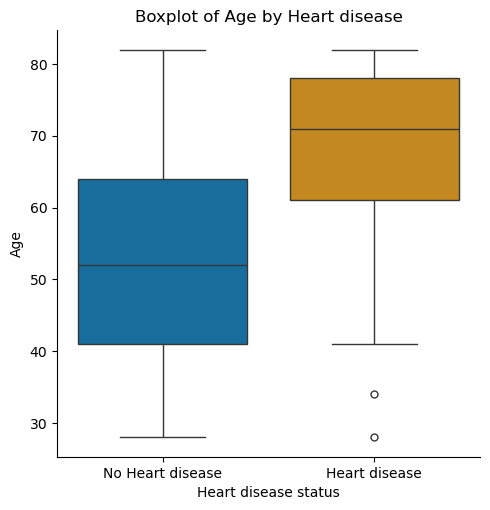

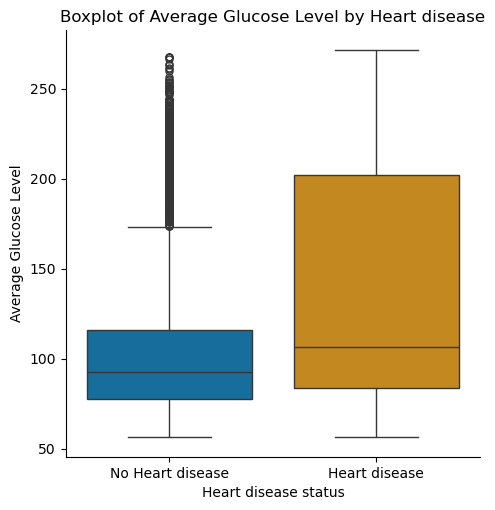

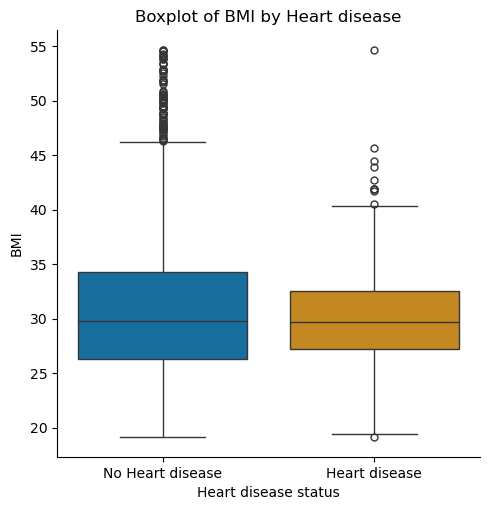

In [20]:
predictors = ['age', 'avg_glucose_level', 'bmi']
target = 'heart_disease'

predictor_labels = {
    'age': 'Age',
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI'
}

target_label = 'Heart disease'

x_axis_label = 'Heart disease status'
palette = sns.color_palette("colorblind", 2)


for predictor in predictors:
    df_plot = df_small.copy() #create a copy of df_small
    heart_disease_labels = {0: 'No Heart disease', 1: 'Heart disease'} # Heart Disease labels

    df_plot['heart_disease_label'] = df_plot['heart_disease'].map(heart_disease_labels)
    g = sns.catplot(x=target, y=predictor, data=df_plot, kind="box",
                hue=target, legend=False, palette = palette)
    # Set customized x-axis labels
    g.set_xticklabels(['No Heart disease', 'Heart disease'])  # 0 = No Heart disease, 1 = Heart disease
    plt.title(f'Boxplot of {predictor_labels[predictor]} by {target_label}')
    g.set_axis_labels(x_axis_label, predictor_labels[predictor])



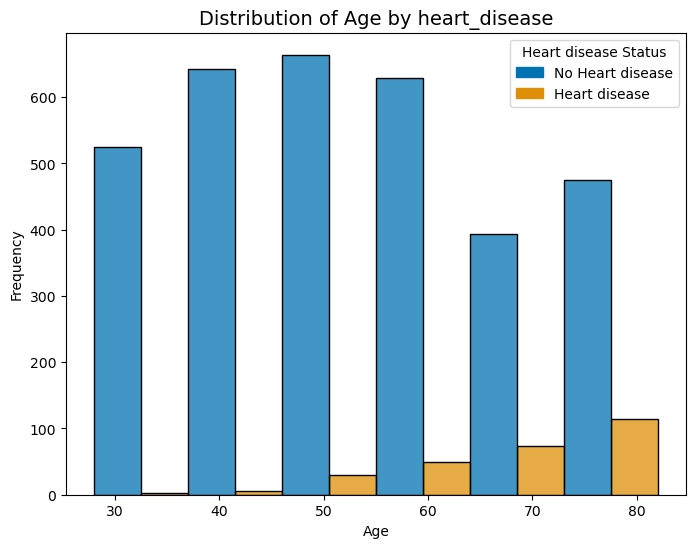

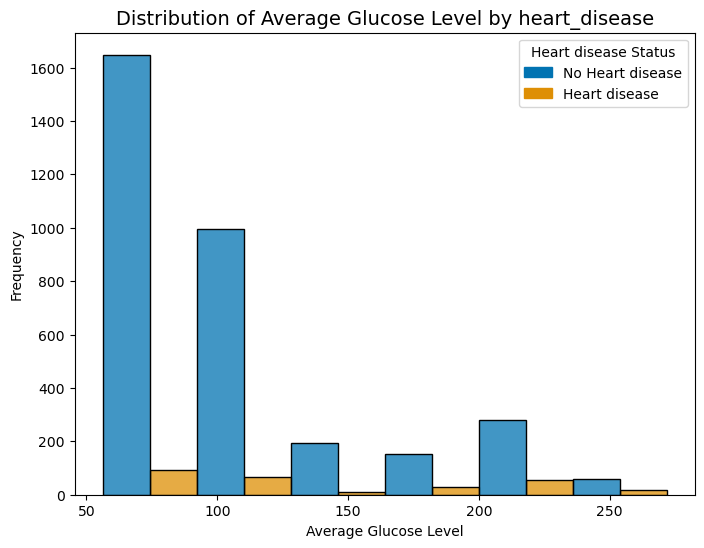

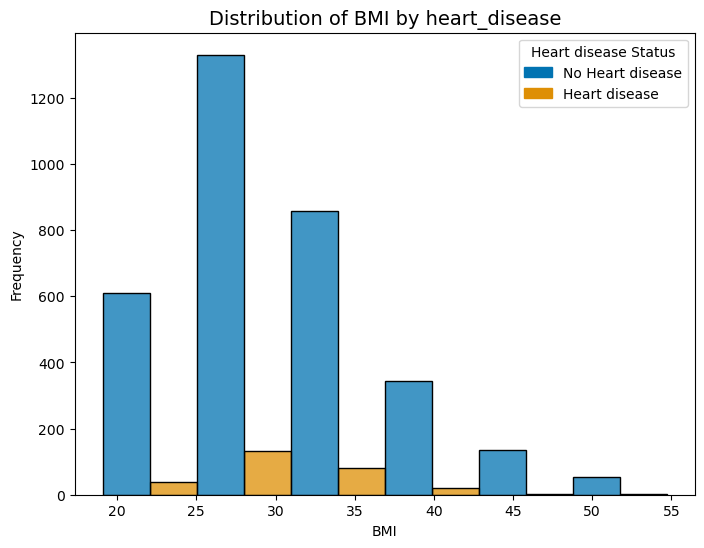

In [21]:

predictors = ['age', 'avg_glucose_level', 'bmi']
target = 'heart_disease'

predictor_labels = {
    'age': 'Age',
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI'
}

target_label = 'Heart disease'

#x_axis_label = 'Heart disease status'
palette = sns.color_palette("colorblind", 2)

#creating histograms
num_bins = 6
for predictor in predictors:
    df_plot = df_small.copy() #create a copy of df_small
    heart_disease_labels = {0: 'No Heart disease', 1: 'Heart disease'} #Heart disease labels
    df_plot['Heart_disease_label'] = df_plot['heart_disease'].map(heart_disease_labels)
    plt.figure(figsize=(8, 6))  # Set the figure size

    sns.histplot(data=df_plot, x=predictor, hue=target, kde= False, palette= palette, multiple="dodge", bins = num_bins)
    
    # Set title and axis labels using the custom predictor labels
    
    plt.title(f'Distribution of {predictor_labels[predictor]} by {target}', fontsize=14)
    plt.xlabel(predictor_labels[predictor])  # Custom x-axis label
    plt.ylabel('Frequency')  # Y-axis label for histograms
    
    # Customize legend
    handles = [plt.Rectangle((0, 0), 1, 1, color= palette[0], label='No Heart disease'),
               plt.Rectangle((0, 0), 1, 1, color= palette[1], label='Heart disease')]
    
    # Add the custom legend
    plt.legend(handles=handles, title='Heart disease Status')
    
    
    # Show the plot
    plt.show()

In [22]:
heart_disease_counts = df_small['heart_disease'].value_counts()
print (heart_disease_counts)

heart_disease
0    3329
1     275
Name: count, dtype: int64


In [23]:
#Shapiro Wilk test
#df_small = df[['heart_disease', 'age', 'avg_glucose_level', 'bmi' ]]
#predictors = ['age', 'avg_glucose_level', 'bmi']
#target = 'heart_disease'
heart_disease_values = df[target].unique()
for predictor in predictors:
    for heart_disease_val in heart_disease_values:
        #group_data generated for each combination of heart disease status and predictor
        group_data = df_small[df_small[target] == heart_disease_val][predictor] 
        stat, p = shapiro(group_data)

        print(f"Shapiro-Wilk test for {predictor} (stroke={heart_disease_val}):")
        print(f"  Statistic: {stat}")
        print(f"  p-value: {p}")
    print()





Shapiro-Wilk test for age (stroke=1):
  Statistic: 0.9256089502092679
  p-value: 1.7068238960396975e-10
Shapiro-Wilk test for age (stroke=0):
  Statistic: 0.9639943690989211
  p-value: 4.75308826899546e-28

Shapiro-Wilk test for avg_glucose_level (stroke=1):
  Statistic: 0.869005723948584
  p-value: 1.465699226349309e-14
Shapiro-Wilk test for avg_glucose_level (stroke=0):
  Statistic: 0.8037301786227503
  p-value: 3.3267501825203442e-53

Shapiro-Wilk test for bmi (stroke=1):
  Statistic: 0.9631582539386844
  p-value: 1.7746731439305248e-06
Shapiro-Wilk test for bmi (stroke=0):
  Statistic: 0.954845035712879
  p-value: 6.306485435326446e-31



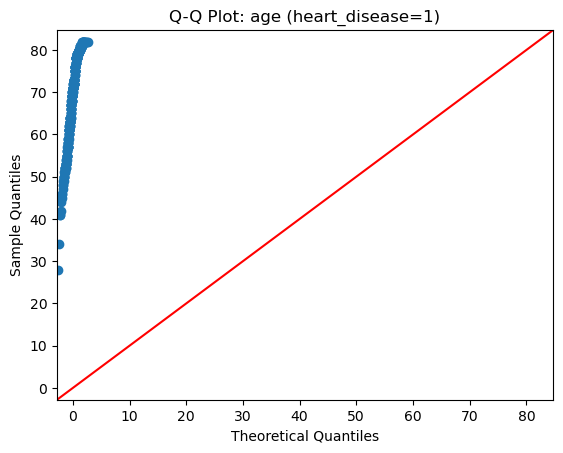

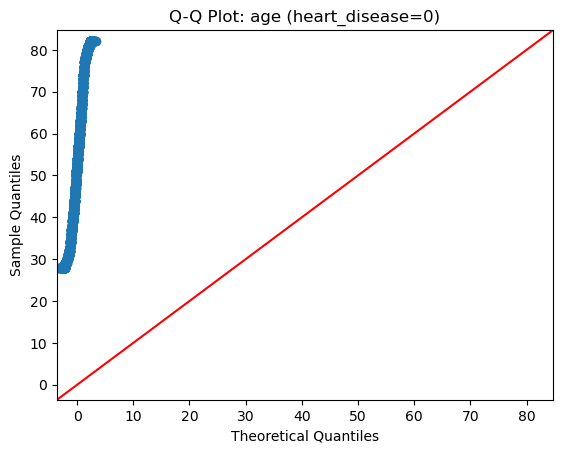

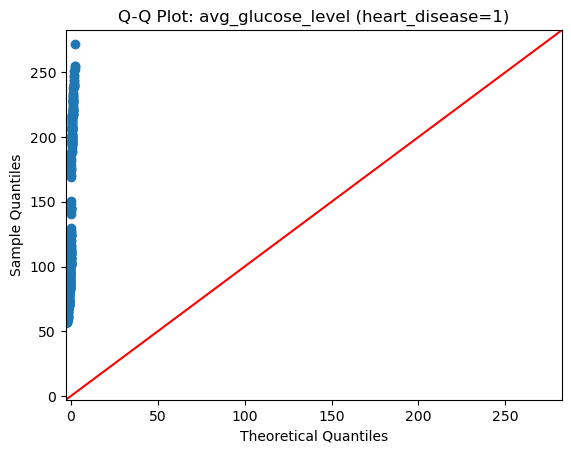

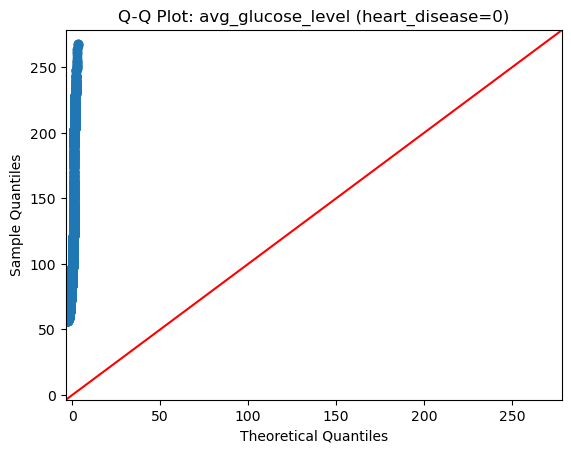

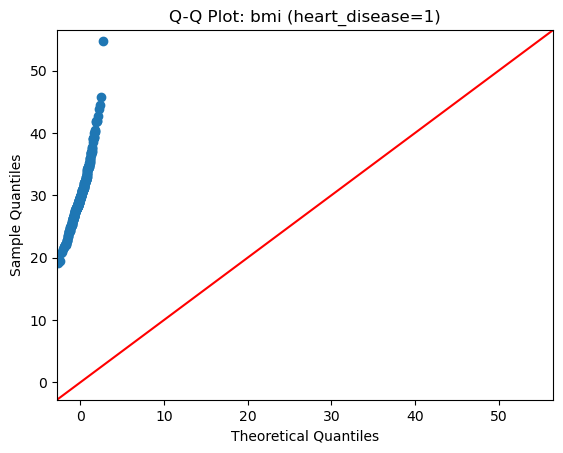

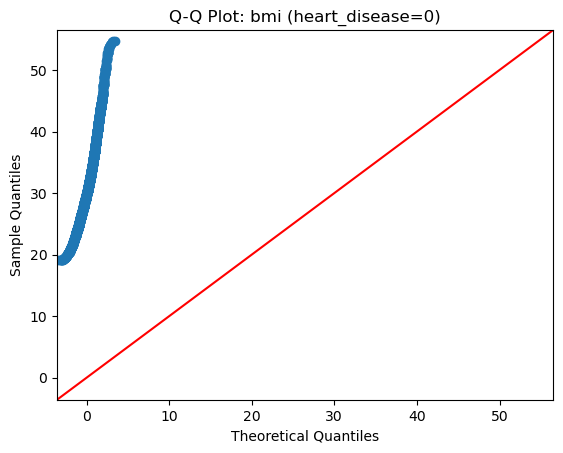

In [24]:
#QQ plots
for predictor in predictors:
    for heart_disease_val in heart_disease_values:
        group_data = df[df[target] == heart_disease_val][predictor]

        # Create Q-Q plot
        sm.qqplot(group_data, line='45')
        plt.title(f'Q-Q Plot: {predictor} (heart_disease={heart_disease_val})')
        plt.show()



In [25]:
#Mann Whitney U test
for predictor in predictors:
    # Separate the data into two groups based on the 'heart_disease' variable
    group_0 = df_small[df_small[target] == 0][predictor]
    group_1 = df_small[df_small[target] == 1][predictor]


    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')

    # Print the results
    print(f"Mann-Whitney U test for {predictor}:")
    print(f"  U statistic: {stat}")
    print(f"  p-value: {p}")

    # Interpret the p-value
    alpha = 0.05  # Significance level
    if p < alpha:
        print(f"  Result: There is a statistically significant difference in {predictor} between heart disease groups.")
    else:
        print(f"  Result: There is no statistically significant difference in {predictor} between heart disease groups.")

    print()
    print()

Mann-Whitney U test for age:
  U statistic: 197463.0
  p-value: 1.5761574502842573e-55
  Result: There is a statistically significant difference in age between heart disease groups.


Mann-Whitney U test for avg_glucose_level:
  U statistic: 348810.5
  p-value: 5.091705655393549e-11
  Result: There is a statistically significant difference in avg_glucose_level between heart disease groups.


Mann-Whitney U test for bmi:
  U statistic: 463491.0
  p-value: 0.7286595334317261
  Result: There is no statistically significant difference in bmi between heart disease groups.


